In [1211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
import pickle as pkl

In [1212]:
data=pd.read_csv('Human_Resources.csv')

In [1213]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [1214]:
# as we can see are not able to see every columns so first we have to get the columns names

In [1215]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [1216]:
'''so we are going to check each and every columns so we can get idea about about work culture

1. Age : probably the employee age
2. Attrition : who left and who not  (target colunm)
3. BusinessTravel : who travel often or rarely
3. DailyRate : dont know for sure but we can asume it is daily income rate
4. Department : which department the employee working
5. DistanceFromHome : distance between from home to office
6. Education : educatioon level
7. EducationField : which field the employee done education
8. '''


'so we are going to check each and every columns so we can get idea about about work culture\n\n1. Age : probably the employee age\n2. Attrition : who left and who not  (target colunm)\n3. BusinessTravel : who travel often or rarely\n3. DailyRate : dont know for sure but we can asume it is daily income rate\n4. Department : which department the employee working\n5. DistanceFromHome : distance between from home to office\n6. Education : educatioon level\n7. EducationField : which field the employee done education\n8. '

## EDA

In [1217]:
# we are going further

In [1218]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [1219]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1220]:
# So we dont have any missing values

In [1221]:
data.duplicated().sum()

0

In [1222]:
# either have duplicates values

In [1223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1224]:
d_types=data.dtypes
cat=d_types[d_types=='object']

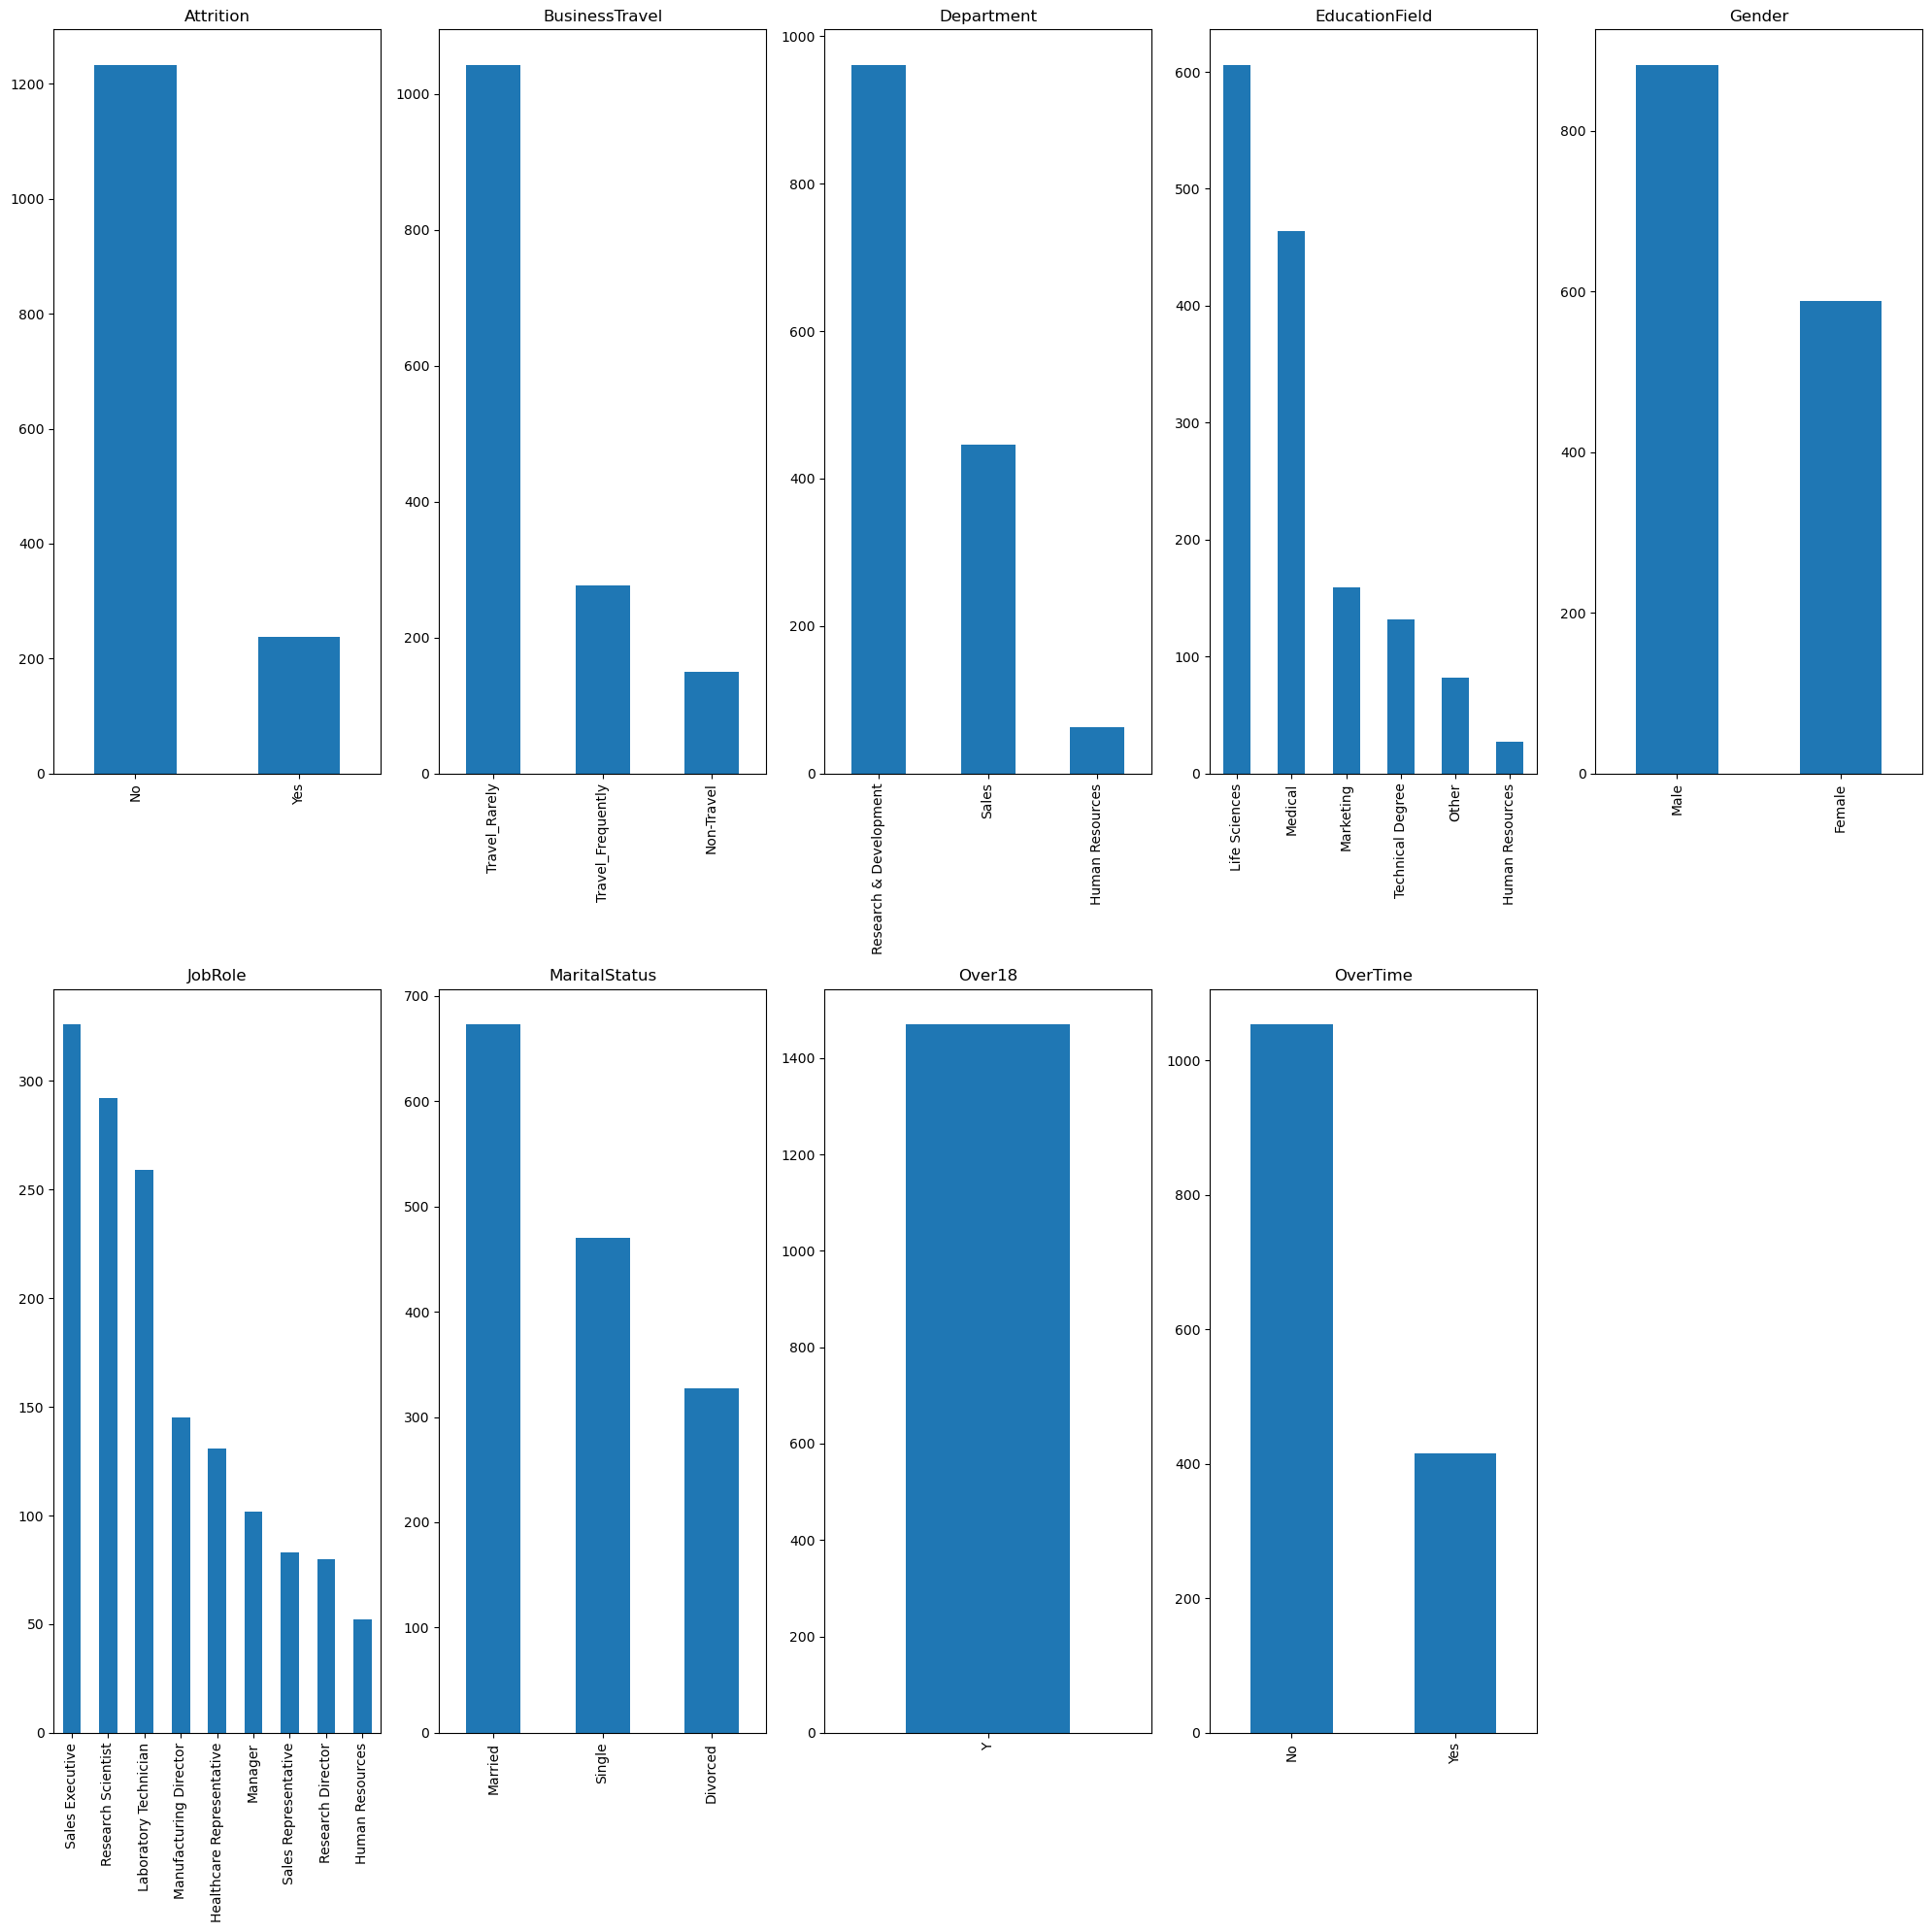

In [1225]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 20))

for column in categorical_columns:
    plt.subplot(2, len(categorical_columns)//2 + 1, categorical_columns.get_loc(column) + 1)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

plt.tight_layout()
plt.show()

In [1226]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<Axes: >

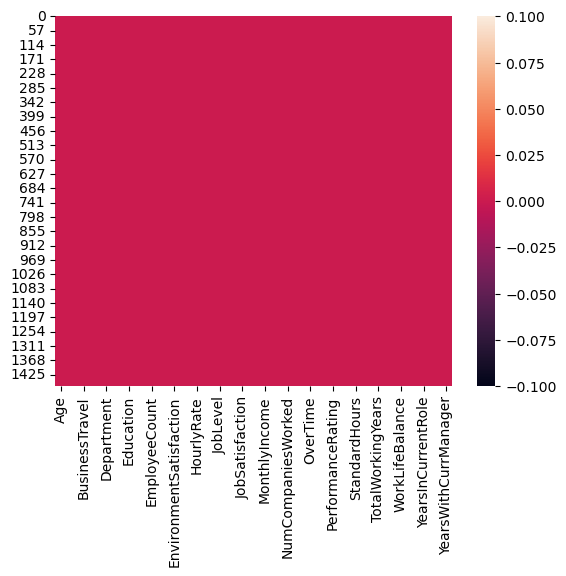

In [1227]:
sns.heatmap(data.isna(),)

In [1228]:
d_types=data.dtypes

In [1229]:
cat_data=d_types[d_types=='object'].index.tolist()
cat_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [1230]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [1231]:
num_plot=len(cat_data)
plt.figure(figsize=(8,5*num_plot))

<Figure size 800x4500 with 0 Axes>

<Figure size 800x4500 with 0 Axes>

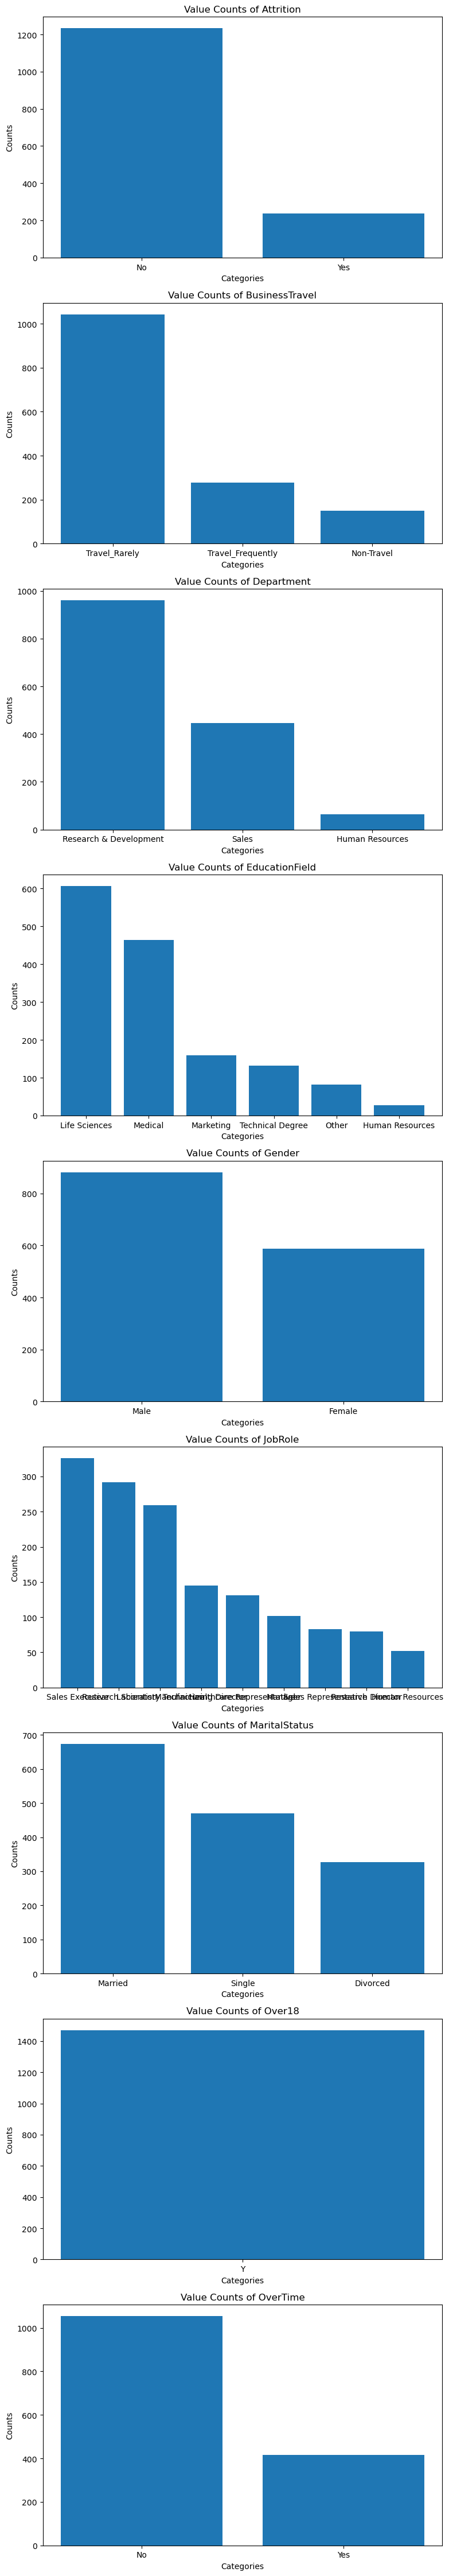

In [1232]:
num_plots = len(cat_data)
plt.figure(figsize=(8, 5 * num_plots))

for i, col in enumerate(cat_data, 1):
    value_counts = data[col].value_counts()
    plt.subplot(num_plots, 1, i)
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title(f'Value Counts of {col}')
    
plt.tight_layout() 
plt.show()

In [1233]:
data.drop('Over18',axis=1,inplace=True)

In [1234]:
'''
Bussiness Travel : 3
Department : 3
Educational Field : 6
Gender : 2
JobRole : 9
Martial Status : 3
Over18 : drop should be
Over Time : 2
'''

'\nBussiness Travel : 3\nDepartment : 3\nEducational Field : 6\nGender : 2\nJobRole : 9\nMartial Status : 3\nOver18 : drop should be\nOver Time : 2\n'

In [1235]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

## Correlation

In [1236]:
data.corr()

C:\Users\ISF\AppData\Local\Temp\ipykernel_14112\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


C:\Users\ISF\AppData\Local\Temp\ipykernel_14112\1341900700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

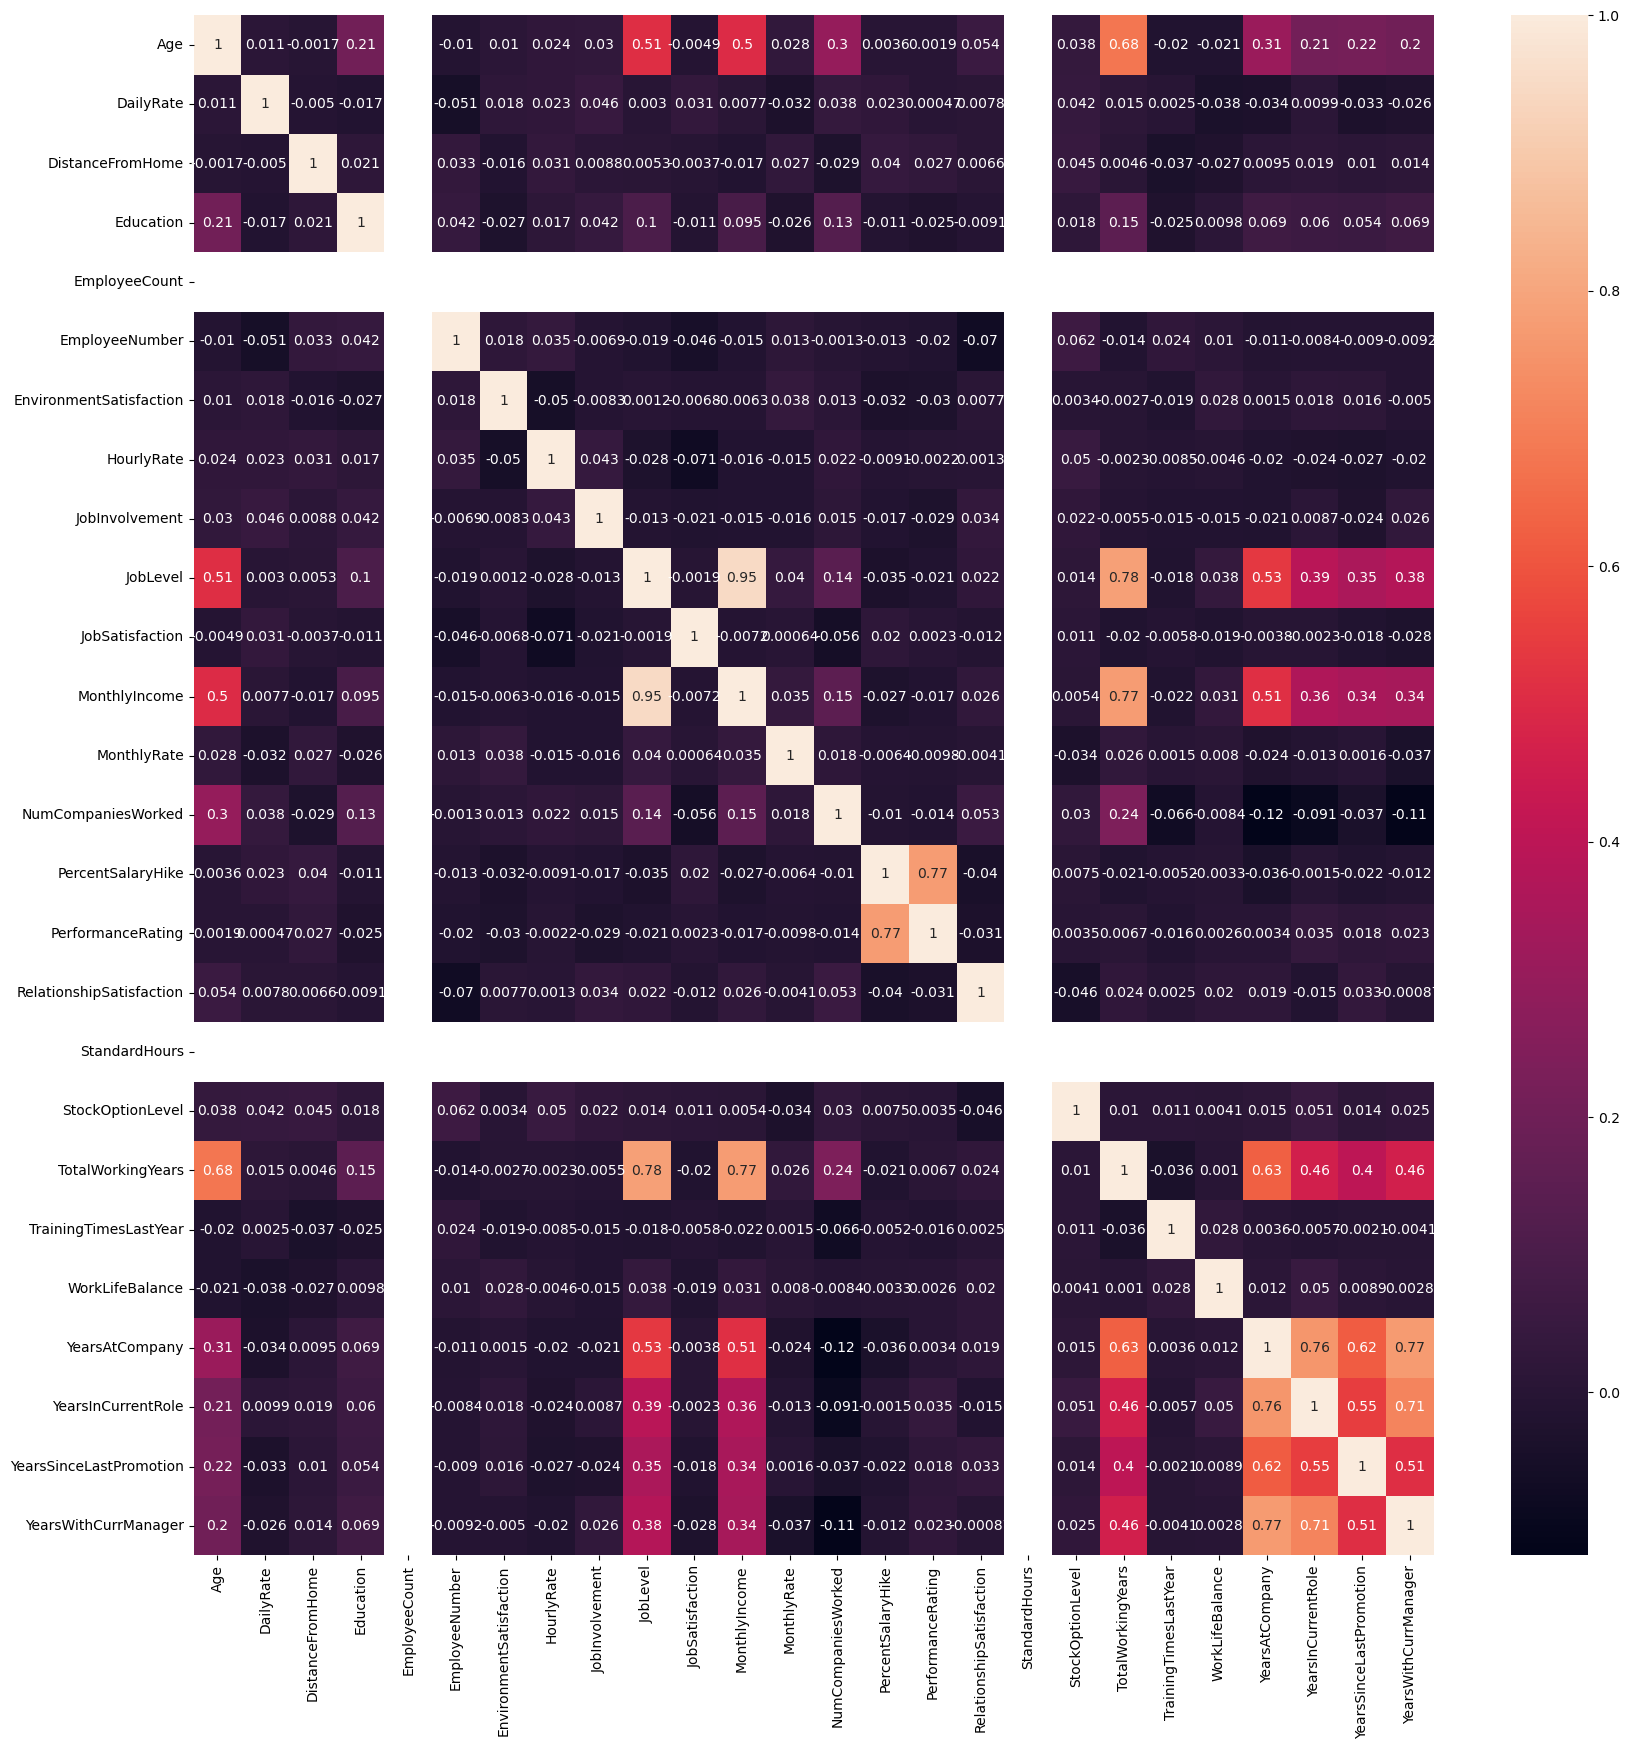

In [1237]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [1238]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Feature Engineering

In [1239]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [1240]:
x=data.drop('Attrition',axis=1)
y=data.loc[:,['Attrition']]

In [1241]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.80,random_state=42)

In [1242]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,train_size=0.80,random_state=42)

In [1243]:
x_train.shape,x_test.shape,x_val.shape

((940, 33), (236, 33), (294, 33))

In [1244]:
y_train.value_counts()

Attrition
No           787
Yes          153
dtype: int64

## ONE hot encoder Used

In [1245]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [1246]:
x=pd.get_dummies(x)
y = le.fit_transform(y)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1247]:
# x_train=pd.get_dummies(x_train)

In [1248]:
# x_train.shape,x_test.shape

In [1249]:
# smt=SMOTE()
# x_train,y_train=smt.fit_resample(x_train,y_train)

## PPS score

In [1250]:
import ppscore as ps

In [1251]:
ps.score(data,'Age','Attrition')['ppscore']

0.03425037377561143

In [1252]:
score={}
for i in data.drop('Attrition',axis=1).columns:
    a=ps.score(data,i,'Attrition')['ppscore']
    score[i]=a

In [1253]:
pps_score=pd.DataFrame.from_dict(score,orient='index',columns=['ppscore'])

In [1254]:
pps_score.sort_values(by='ppscore', ascending=True)

,ppscore
DailyRate,0.000000
YearsAtCompany,0.000000
EmployeeNumber,0.000000
MonthlyRate,0.000000
MonthlyIncome,0.000000
MaritalStatus,0.000005
YearsInCurrentRole,0.000005
WorkLifeBalance,0.000005
TrainingTimesLastYear,0.000005
StockOptionLevel,0.000005


In [1255]:
pps_score[pps_score['ppscore']==0]

,ppscore
DailyRate,0.0
EmployeeNumber,0.0
MonthlyIncome,0.0
MonthlyRate,0.0
YearsAtCompany,0.0


In [1256]:
'''as we can see this column dont have any lenear or non lenear relation with target columns'''

'as we can see this column dont have any lenear or non lenear relation with target columns'

## Univariate Selection

In [1257]:
# Chi square test
test=SelectKBest(score_func=chi2,k=5)
chi_score=test.fit(x,y)

In [1259]:
chi_score.scores_

array([8.41552768e+01, 9.56580494e+02, 6.37721416e+01, 5.20642224e-01,
       3.40841167e-30, 5.81203260e+01, 6.89059434e+00, 4.31779090e-01,
       4.60561607e+00, 2.49392423e+01, 7.01194663e+00, 1.27922294e+05,
       1.19663355e+03, 6.43865444e+00, 2.35026858e-01, 5.06064443e-04,
       1.33233286e+00, 0.00000000e+00, 2.52688260e+01, 2.30721618e+02,
       3.08579616e+00, 1.08554296e+00, 1.42100054e+02, 1.17522596e+02,
       7.60172347e+00, 1.10671534e+02, 7.31793403e+00, 1.58166228e+01,
       1.04785690e+00, 3.98626382e-01, 3.70291570e+00, 6.69446524e+00,
       1.91887761e+00, 9.24044433e-01, 4.07915378e+00, 2.22213257e+00,
       4.44605699e-01, 6.43586003e+00, 7.65129816e-01, 5.10086544e-01,
       8.29251836e+00, 1.85975262e+00, 1.16994947e+01, 9.49613598e+00,
       9.12658865e+00, 1.09780098e+01, 1.52305445e-04, 4.47333341e-01,
       3.42902680e+01, 8.79442184e+00, 6.59758576e+00, 3.07716690e+01,
       2.51988119e+01, 6.38450667e+01])

In [1261]:
score_chi=pd.DataFrame(chi_score.scores_).T
score_chi.columns=x.columns
score_chi

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,84.155277,956.580494,63.772142,0.520642,3.408412e-30,58.120326,6.890594,0.431779,4.605616,24.939242,...,9.126589,10.97801,0.000152,0.447333,34.290268,8.794422,6.597586,30.771669,25.198812,63.845067


In [1264]:
# score_chi.sort_values(by='',ascending=False)

## Recursive Feature Elemination

In [1265]:
lg=LogisticRegression()
rfe=RFE(lg)
rfe.fit(x,y)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

RFE(estimator=LogisticRegression())

In [1266]:
rfe.n_features_

27

In [1268]:
rfe.support_

array([False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True])

In [1269]:
rfe.ranking_

array([19, 25, 18, 22, 23, 26,  1, 24,  1, 13,  1, 27, 28,  8, 20, 16,  1,
       17,  1, 10,  1,  1, 12,  2,  3,  7,  1,  1,  5, 11,  9,  1,  1,  1,
        6,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1, 15, 21,  1, 14,  1,
        1,  1,  1])

In [1297]:
score_rfe=pd.DataFrame(rfe.ranking_).T
score_rfe.columns=x.columns
score_rfe

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,19,25,18,22,23,26,1,24,1,13,...,1,1,15,21,1,14,1,1,1,1


In [1318]:
score_rfe_support=pd.DataFrame(rfe.support_).T
score_rfe_support.columns=x.columns
# score_rfe_support = score_rfe_support.applymap(lambda x: 'Yes' if x else 'No')
score_rfe_support

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,False,False,False,False,False,False,True,False,True,False,...,True,True,False,False,True,False,True,True,True,True


## Tree Based

In [1320]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
score_dt=dt.feature_importances_

In [1323]:
score_dt=pd.DataFrame(score_dt).T
score_dt.columns=x.columns
score_dt

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.040819,0.057754,0.012854,0.036496,0.0,0.079911,0.023194,0.061366,0.010086,0.0,...,0.004208,0.0,0.015247,0.002283,0.004261,0.0,0.007546,0.022777,0.060574,0.0


In [953]:
# we used OneHotEncoder to convert categorical data into numeric

In [954]:
# we are plitting data into x and y then train test

In [955]:
x=data.drop('Attrition',axis=1)
y=data.iloc[:,[1]]

In [956]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [957]:
y=y.replace({'Yes': 1,'No':0})
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [958]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [959]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.80,random_state=43)

In [960]:
x_train.shape,y_train.shape

((881, 34), (881, 1))

## Separating Categorical and Numerical Dtypes

In [961]:
dtypes=x_train.dtypes
cat_dtypes=dtypes[dtypes=='object'].index.tolist()
num_dtypes=dtypes[dtypes!='object'].index.tolist()

In [962]:
cat_dtypes

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [963]:
# x_test.to_csv('x_test.csv',index=False)
# y_test.to_csv('y_test.csv',index=False)

## Using OneHotEncoder 

In [964]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)

In [965]:
x_train_new=ohe.fit_transform(x_train[cat_dtypes])

In [966]:
x_train_new.shape # this is shape is less because it only have cat 

(881, 21)

## Now appending to the x_train

In [967]:
x_train_stack=np.hstack((x_train[num_dtypes].values,x_train_new)) #this is best method to join num columns and cat columns 

In [968]:
x_train_stack.shape

(881, 47)

In [969]:
x_train_stack=pd.DataFrame(x_train_stack)

In [970]:
x_train_stack.shape

(881, 47)

In [971]:
x_train_stack

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,35.0,384.0,8.0,4.0,1.0,805.0,1.0,72.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,27.0,155.0,4.0,3.0,1.0,2064.0,2.0,87.0,4.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,42.0,1265.0,3.0,3.0,1.0,894.0,3.0,95.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49.0,1098.0,4.0,2.0,1.0,1256.0,1.0,85.0,2.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,588.0,8.0,2.0,1.0,436.0,3.0,65.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,30.0,1334.0,4.0,2.0,1.0,121.0,3.0,63.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
877,42.0,1368.0,28.0,4.0,1.0,551.0,4.0,88.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
878,29.0,442.0,2.0,2.0,1.0,388.0,2.0,44.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
879,29.0,318.0,8.0,4.0,1.0,454.0,2.0,77.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [972]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
580,35,Travel_Rarely,384,Sales,8,4,Life Sciences,1,805,1,...,2,80,1,3,1,2,3,2,0,2
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
643,42,Travel_Rarely,1265,Research & Development,3,3,Life Sciences,1,894,3,...,2,80,1,17,1,2,5,3,1,3
899,49,Travel_Rarely,1098,Research & Development,4,2,Medical,1,1256,1,...,3,80,1,23,2,4,1,0,0,0
319,32,Travel_Rarely,588,Sales,8,2,Technical Degree,1,436,3,...,4,80,0,13,2,3,13,12,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,30,Travel_Rarely,1334,Sales,4,2,Medical,1,121,3,...,2,80,3,11,4,2,11,8,2,7
413,42,Travel_Frequently,1368,Research & Development,28,4,Technical Degree,1,551,4,...,4,80,3,7,4,4,6,5,0,4
282,29,Travel_Frequently,442,Sales,2,2,Life Sciences,1,388,2,...,1,80,0,10,3,2,10,7,0,9
336,29,Travel_Rarely,318,Research & Development,8,4,Other,1,454,2,...,4,80,0,7,4,2,7,7,0,7


In [973]:
x_train.shape

(881, 34)

In [974]:
# now we splitted the data into train test now we have to check the y_train if the data is balanced or not

In [975]:
y_train.value_counts()

Attrition
0            733
1            148
dtype: int64

## Using get_dummies 

In [976]:
x_train_dummy=pd.get_dummies(x_train,drop_first=True)

In [977]:
x_train_dummy.shape

(881, 47)

In [978]:
x_train_dummy.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
580,35,384,8,4,1,805,1,72,3,1,...,0,0,0,0,0,0,1,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
643,42,1265,3,3,1,894,3,95,4,2,...,1,0,0,0,0,0,0,1,0,1
899,49,1098,4,2,1,1256,1,85,2,5,...,0,1,0,0,0,0,0,1,0,0
319,32,588,8,2,1,436,3,65,2,2,...,0,0,0,0,0,1,0,1,0,1


In [979]:
x_train_stack.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,35.0,384.0,8.0,4.0,1.0,805.0,1.0,72.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,27.0,155.0,4.0,3.0,1.0,2064.0,2.0,87.0,4.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,42.0,1265.0,3.0,3.0,1.0,894.0,3.0,95.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49.0,1098.0,4.0,2.0,1.0,1256.0,1.0,85.0,2.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,588.0,8.0,2.0,1.0,436.0,3.0,65.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [980]:
# d_types1=data.drop('Attrition',axis=1).dtypes
d_types=data.dtypes

In [981]:
cat_data=d_types[d_types=='object'].index.tolist()

In [982]:
num_data=d_types[d_types!='object'].index.tolist()

In [983]:
cat_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## SMOTE method used for balance the data

In [984]:
smt=SMOTE(random_state=20)

In [985]:
# x_train_dummy,y_train=smt.fit_resample(x_train_dummy,y_train)

In [986]:
pca=PCA(n_components=8,random_state=42)

In [987]:
random=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=15)

## Numerical Processor

In [988]:
num_processor=Pipeline(
    steps=[('num',SimpleImputer(strategy='mean')),
    ('Scaling',StandardScaler())])

In [989]:
num_processor

Pipeline(steps=[('num', SimpleImputer()), ('Scaling', StandardScaler())])

## Categorical Processor

In [990]:
cat_processor=Pipeline(
    steps=[('cat',SimpleImputer(strategy='constant')),
    ('OneHotEncoder',ohe)])

In [991]:
cat_processor

Pipeline(steps=[('cat', SimpleImputer(strategy='constant')),
                ('OneHotEncoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [992]:
'''i have to solve issue'''

'i have to solve issue'

## Combining All Processor

In [993]:
# one_hot=ColumnTransformer(transformers=[('OneHotEncoder',OneHotEncoder(drop='first'),cat_data)],remainder='passthrough')
processor=ColumnTransformer(transformers=[('categorical',cat_processor,cat_dtypes),
                                       ('numerical',num_processor,num_dtypes),
                                         ],remainder='passthrough')                    

In [994]:
processor.fit_transform(x_train)

array([[ 0.        ,  1.        ,  0.        , ..., -0.58339386,
        -0.67936686, -0.55443577],
       [ 0.        ,  1.        ,  1.        , ..., -0.58339386,
        -0.67936686, -0.26761374],
       [ 0.        ,  1.        ,  1.        , ..., -0.30406234,
        -0.33929743, -0.26761374],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.81326372,
        -0.67936686,  1.45331844],
       [ 0.        ,  1.        ,  1.        , ...,  0.81326372,
        -0.67936686,  0.87967438],
       [ 1.        ,  0.        ,  1.        , ..., -0.58339386,
         0.34084144, -0.26761374]])

## Transformer 1

In [995]:
transformer_1=ColumnTransformer(transformers=[('pca',pca,slice(0,100))])

In [996]:
# transformer_2.fit_transform(x_train).shape

In [997]:
pipe=make_pipeline(processor,transformer_1)
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over1...
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('pca',
                                                  PCA(n_components=8,
                                                      random_state=42),
                                                  slice(0, 100, None))]))])

In [998]:
x_val.shape

(221, 34)

In [999]:
# pipe.fit(x_train_stack,y_train)

## Combining All Processor With Random Forest

In [1000]:
random_forest_model=make_pipeline(pipe,
                                  random)

In [1001]:
random_forest_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('categorical',
                                                                   Pipeline(steps=[('cat',
                                                                                    SimpleImputer(strategy='constant')),
                                                                                   ('OneHotEncoder',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['BusinessTravel',
                                                                    'Department',
                                                                    'EducationField',
                                                                    'Gender',
                                                                    'Job...
                                                                    'TotalWorkingYears',
                                                                    'TrainingTimesLastYear',
                                                                    'WorkLifeBalance',
                                                                    'YearsAtCompany',
                                                                    'YearsInCurrentRole',
                                                                    'YearsSinceLastPromotion',
                                                                    'YearsWithCurrManager'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(transformers=[('pca',
                                                                   PCA(n_components=8,
                                                                       random_state=42),
                                                                   slice(0, 100, None))]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [1002]:
x_train.shape,y_train.shape

((881, 34), (881, 1))

In [1003]:
random_forest_model.fit(x_train,y_train)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('categorical',
                                                                   Pipeline(steps=[('cat',
                                                                                    SimpleImputer(strategy='constant')),
                                                                                   ('OneHotEncoder',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['BusinessTravel',
                                                                    'Department',
                                                                    'EducationField',
                                                                    'Gender',
                                                                    'Job...
                                                                    'TotalWorkingYears',
                                                                    'TrainingTimesLastYear',
                                                                    'WorkLifeBalance',
                                                                    'YearsAtCompany',
                                                                    'YearsInCurrentRole',
                                                                    'YearsSinceLastPromotion',
                                                                    'YearsWithCurrManager'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(transformers=[('pca',
                                                                   PCA(n_components=8,
                                                                       random_state=42),
                                                                   slice(0, 100, None))]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [1004]:
y_pred=random_forest_model.predict(x_val)

In [1005]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       180
           1       0.57      0.10      0.17        41

    accuracy                           0.82       221
   macro avg       0.70      0.54      0.53       221
weighted avg       0.78      0.82      0.76       221



In [1006]:
x_train.shape

(881, 34)

In [1007]:
filename='pipeline.pkl'
with open(filename,'wb') as file:
    pkl.dump(pipe,file)

In [1008]:
# random_forest_model.predict()

## Now we are using ANN 

In [1009]:
from tensorflow import keras
from keras.models import Model
from keras.layers import MaxPooling2D,Dense,Dropout,Add
from keras import Sequential,layers

In [1010]:
input_size=x_train.shape[1]
input_size

34

In [1011]:
ann_model=Sequential()

ann_model.add(Dense(units=100,activation='relu',input_dim=input_size))
ann_model.add(Dense(units=150,activation='relu'))
ann_model.add(Dense(units=200,activation='relu'))
ann_model.add(Dense(units=250,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))

In [1012]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [1013]:
ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               3500      
                                                                 
 dense_16 (Dense)            (None, 150)               15150     
                                                                 
 dense_17 (Dense)            (None, 200)               30200     
                                                                 
 dense_18 (Dense)            (None, 250)               50250     
                                                                 
 dense_19 (Dense)            (None, 1)                 251       
                                                                 
Total params: 99,351
Trainable params: 99,351
Non-trainable params: 0
_________________________________________________________________


In [1017]:
ann_model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.20)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## ANN Model Pipeline

In [1015]:
ANN_model=make_pipeline(processor,pca,ann_model)

In [1016]:
ANN_model.fit(x_train,y_train)

ValueError: in user code:

    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ISF\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 34), found shape=(None, 8)


In [ ]:
y_pred_ann=ANN_model.predict(x_test)

In [ ]:
x_test